# The Ames, Iowa Housing Data
## Overview
This is the Ames housing data that has a variety of variables which include different types of categorical variables one of which are subjective quality variables.  Other variables included are continuous variable like square footage of the house. 

## Hypothesis
What are the top ten best variables that predict housing prices in Ames, Iowa.  
    1. In general what variables predict housing prices the best.   
    2. If the realtor is asking a quick way of mesasuring so using nonsubjective variables to predict. 


#### Data Set Citation
The data set was downloaded from https://www.openintro.org/book/statdata/?data=ames<br>
the csv file can be found at https://www.openintro.org/book/statdata/ames.csv <br>
The explanation of each columns can be found here http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

#### Importing all the libraies

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.linear_model import Ridge 
rig=Ridge()
from sklearn.linear_model import Lasso
la=Lasso()
from sklearn.linear_model import ElasticNet
en=ElasticNet()
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
#using pandas profiling it can give us a broad description of all variables
import pandas_profiling as pp

In [2]:
#checking we are in the correct path
os.getcwd()

'/Users/andreafung/Dropbox/Springboard/github/Capstone1/Exploratory Data Analysis'

In [3]:
#Changing to the correct path to obtain the Ames Data.
path="/Users/andreafung/Dropbox/Springboard/github/Capstone1"
os.chdir(path)

#### Loading the data file

In [4]:
hd=pd.read_csv('Data/ames.csv', index_col=0)

## Exploring the data
#### Looking at the general columns and data types

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS.SubClass      2930 non-null   int64  
 2   MS.Zoning        2930 non-null   object 
 3   Lot.Frontage     2440 non-null   float64
 4   Lot.Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot.Shape        2930 non-null   object 
 8   Land.Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot.Config       2930 non-null   object 
 11  Land.Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition.1      2930 non-null   object 
 14  Condition.2      2930 non-null   object 
 15  Bldg.Type        2930 non-null   object 
 16  House.Style      2930 non-null   object 
 17  Overall.Qual  

In [6]:
hd.shape

(2930, 81)

There are about 81 columns in the data set.  We would need to minimize the columns before tackling our hypothesis.  

#### Checking the general appearance of the data. 

In [7]:
hd.describe()

PID  MS.SubClass  Lot.Frontage       Lot.Area  Overall.Qual  \
count  2.930000e+03  2930.000000   2440.000000    2930.000000   2930.000000   
mean   7.144645e+08    57.387372     69.224590   10147.921843      6.094881   
std    1.887308e+08    42.638025     23.365335    7880.017759      1.411026   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284770e+08    20.000000     58.000000    7440.250000      5.000000   
50%    5.354536e+08    50.000000     68.000000    9436.500000      6.000000   
75%    9.071811e+08    70.000000     80.000000   11555.250000      7.000000   
max    1.007100e+09   190.000000    313.000000  215245.000000     10.000000   

       Overall.Cond   Year.Built  Year.Remod.Add  Mas.Vnr.Area  BsmtFin.SF.1  \
count   2930.000000  2930.000000     2930.000000   2907.000000   2929.000000   
mean       5.563140  1971.356314     1984.266553    101.896801    442.629566   
std        1.111537    30.245361       20.860286    179.112611    455.590839   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1954.000000     1965.000000      0.000000      0.000000   
50%        5.000000  1973.000000     1993.000000      0.000000    370.000000   
75%        6.000000  2001.000000     2004.000000    164.000000    734.000000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       ...  Wood.Deck.SF  Open.Porch.SF  Enclosed.Porch  X3Ssn.Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen.Porch    Pool.Area      Misc.Val      Mo.Sold      Yr.Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 38 columns]

Using Pandas Profile reporter to get a detailed look at the data.  Exploring null values and correlations 

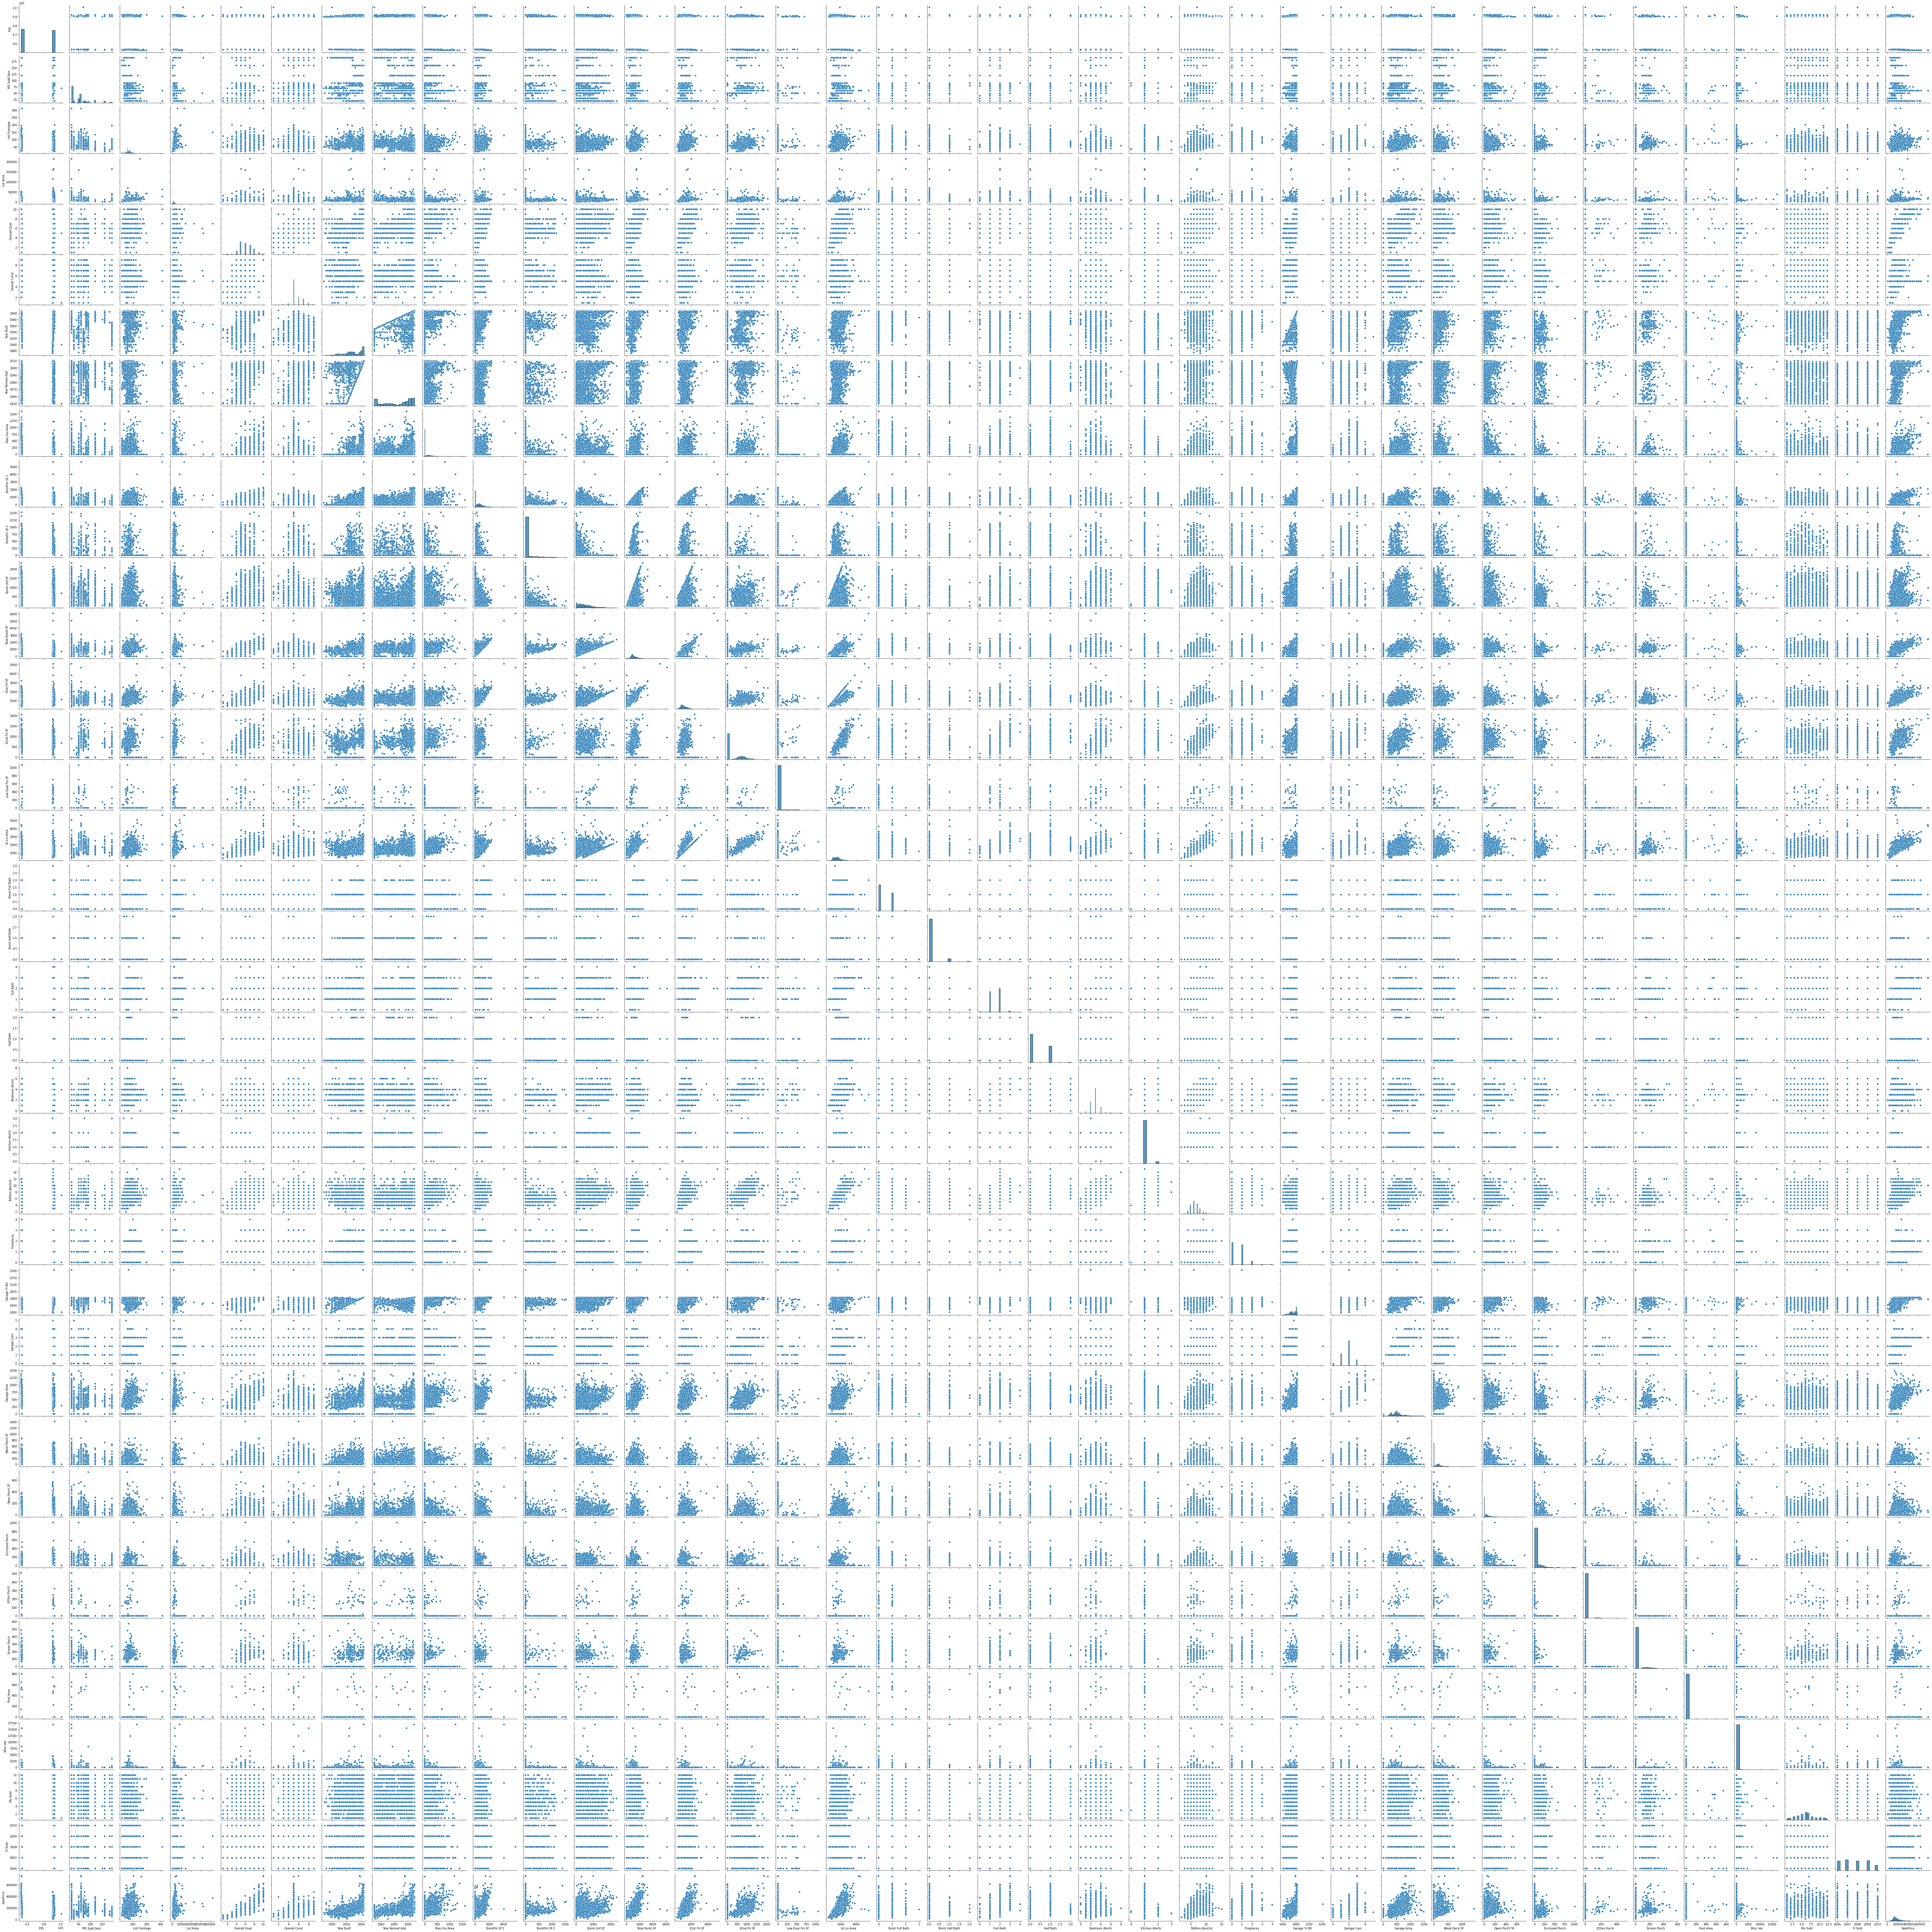

In [9]:
#pair plot of all the variables in the data set.  
sns.pairplot(hd)

array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'MS.SubClass'}>,
        <AxesSubplot:title={'center':'Lot.Frontage'}>,
        <AxesSubplot:title={'center':'Lot.Area'}>,
        <AxesSubplot:title={'center':'Overall.Qual'}>,
        <AxesSubplot:title={'center':'Overall.Cond'}>],
       [<AxesSubplot:title={'center':'Year.Built'}>,
        <AxesSubplot:title={'center':'Year.Remod.Add'}>,
        <AxesSubplot:title={'center':'Mas.Vnr.Area'}>,
        <AxesSubplot:title={'center':'BsmtFin.SF.1'}>,
        <AxesSubplot:title={'center':'BsmtFin.SF.2'}>,
        <AxesSubplot:title={'center':'Bsmt.Unf.SF'}>],
       [<AxesSubplot:title={'center':'Total.Bsmt.SF'}>,
        <AxesSubplot:title={'center':'X1st.Flr.SF'}>,
        <AxesSubplot:title={'center':'X2nd.Flr.SF'}>,
        <AxesSubplot:title={'center':'Low.Qual.Fin.SF'}>,
        <AxesSubplot:title={'center':'Gr.Liv.Area'}>,
        <AxesSubplot:title={'center':'Bsmt.Full.Bath'}>],
       [<AxesSubplo

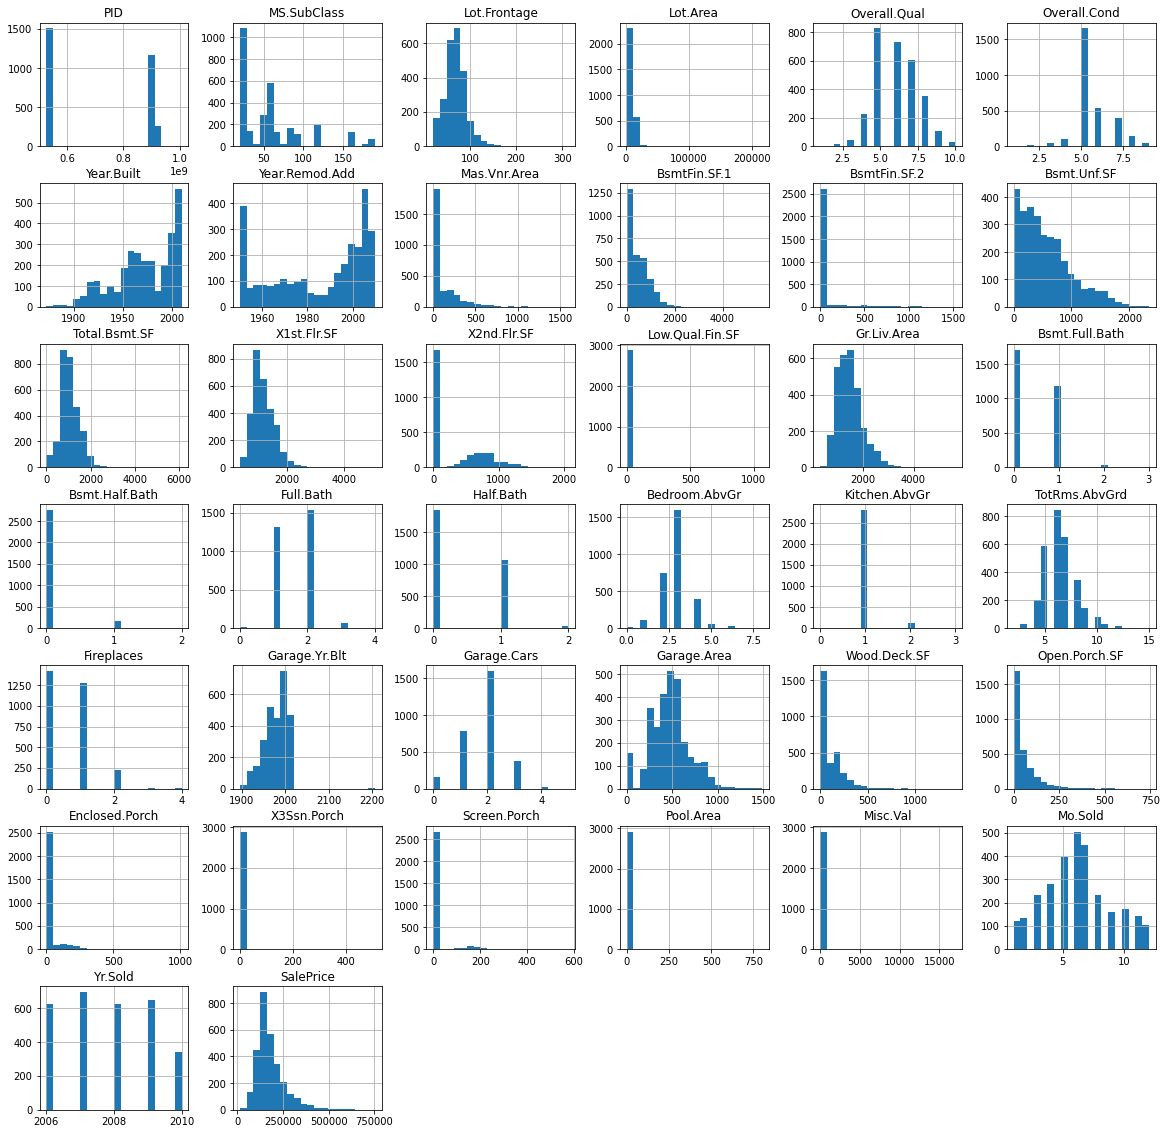

In [10]:
hd.hist(bins=20, figsize=(20,20))

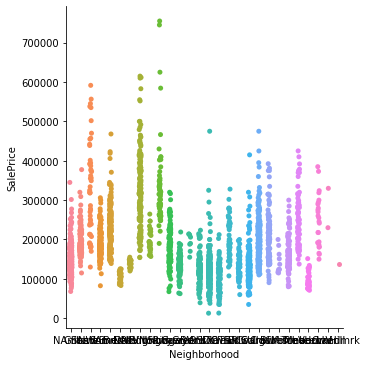

In [11]:
#Looking at location vs sales price
sns.catplot(x=hd['Neighborhood'],y=hd['SalePrice'],data=hd)

Looking at the comparision between neighborhoods and sale prices it doesn't look like there is any difference in sale prices comparing each neighborhood.  

#### Look at different types of house and their sales price.  

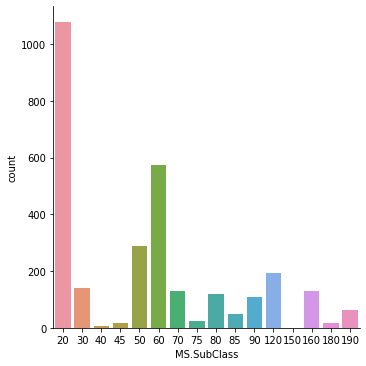

In [12]:
sns.catplot(x=hd['MS.SubClass'], kind="count", data=hd)

After lookning at this graph it looks like the majority of the hours are 1 story and are built in 1946 or newer.  

## Deleting Variables  

Looking at the data description was the first determination of what to take out first.  
**1. Looked at variables that have more than 90% missing values.**<br></br>
2. Look at features with high variance or extremely low variance.  
3. Looked at variables with high correlations to sales price
4. Looked at variables that low interest that does not pertain to the goal.  

## Deleting Variables with more than 90% missing variables
1. Alley - because there were missing information also the choices are minimal 
2. MiscVal - too many null values. 
3. PoolQC
4. Fence
5. MiscFeature

In [13]:
hd.isnull().sum()


PID                 0
MS.SubClass         0
MS.Zoning           0
Lot.Frontage      490
Lot.Area            0
                 ... 
Mo.Sold             0
Yr.Sold             0
Sale.Type           0
Sale.Condition      0
SalePrice           0
Length: 81, dtype: int64

In [14]:
hd['Alley'].isna().sum()

2732

In [15]:
hd['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

#### Misc.Val 
Even though when you add up null values. There are still a lot of 0's in this column.  Misc.Val is the miscellaneous values of the miscellaneous features.  Since over 90% of the data is 0 we will delete the variable.  

In [16]:
hd['Misc.Val'].isna().sum()

0

In [17]:
hd['Misc.Val'].value_counts()

0        2827
400        18
500        13
450         9
600         8
2000        7
700         7
1500        3
1200        3
650         3
480         2
4500        2
3000        2
2500        2
420         1
1150        1
15500       1
455         1
6500        1
80          1
1512        1
8300        1
1400        1
1300        1
12500       1
1000        1
460         1
900         1
800         1
750         1
300         1
54          1
620         1
17000       1
350         1
560         1
490         1
3500        1
Name: Misc.Val, dtype: int64

####  PoolQC
The pool quality has over 99% missing values. Since not all houses have pools and not all places have a rating on their pool quality.  We will keep this out of our dataset.  

In [18]:
hd['Pool.QC'].isna().sum()

2917

#### Fence
This is about Fence quality since there still a lot of missing values.    We will ignore this variable as well.  

In [19]:
hd['Fence'].isna().sum()

2358

####  MiscFeature
This miscellaneous feature not covered in other categories.   Since this has a lot of variance and over 96% zeroes we will exclude this variable.  

In [20]:
hd['Misc.Feature'].isna().sum()

2824

### Deleting the unnecessary variables 

In [21]:
#include PID to dropping features since it is the same as the index which is not necessary
hdd=hd.drop(['PID','Misc.Feature','Pool.QC','Misc.Val','Fence'], axis=1)

In [22]:
df=hdd.copy()

### Looking at null variables

#### Looking into Alley Variable
Since over 93% of the variable is null we want to explore this further.  This is the type of alley access to the property.  not all houses have alley but this has two different types.  Gravel and pavement. 
- Grvl = Gravel
- Pave = Paved
- NA = No Alley access

 


In [23]:
hd['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [24]:
hd['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

After looking at the value counts and the variable definition. 
Alley should be kept.  Instead fill in the missing values (nan) with noAl meaning no alley acesss

In [25]:
df['Alley'].fillna("Noal", inplace=True)

In [26]:
df['Alley'].value_counts()

Noal    2732
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [27]:
dff=df.copy()

##### Lot Frontage 
This variable has 490 missing values

In [28]:
df['Lot.Frontage'].isna().sum()

490

In [29]:
df['Lot.Frontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
155.0      1
28.0       1
22.0       1
31.0       1
Name: Lot.Frontage, Length: 128, dtype: int64

In [30]:
df['Lot.Frontage'].unique()

array([141.,  80.,  81.,  93.,  74.,  78.,  41.,  43.,  39.,  60.,  75.,
        nan,  63.,  85.,  47., 152.,  88., 140., 105.,  65.,  70.,  26.,
        21.,  53.,  24., 102.,  98.,  83.,  94.,  95.,  90.,  79., 100.,
        44., 110.,  61.,  36.,  67., 108.,  59.,  92.,  58.,  56.,  73.,
        72.,  84.,  76.,  50.,  55.,  68., 107.,  25.,  30.,  57.,  40.,
        77., 120., 137.,  87., 119.,  64.,  96.,  71.,  69.,  52.,  51.,
        54.,  86., 124.,  82.,  38.,  48.,  89.,  66.,  45.,  35., 129.,
        31.,  42.,  28.,  99., 104.,  97., 103.,  34., 117., 149., 122.,
        62., 174., 106., 112.,  32., 115., 128.,  91.,  33., 121., 144.,
       130., 109., 150., 113., 125., 101.,  46., 114., 135., 136.,  37.,
        22., 313.,  49., 123., 160., 195., 118., 134., 182., 116., 138.,
       155., 126., 200., 168., 111., 131., 153., 133.])

(array([4.370e+02, 1.304e+03, 5.850e+02, 9.100e+01, 1.500e+01, 5.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

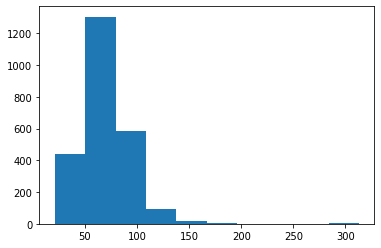

In [31]:
plt.hist(df['Lot.Frontage'], bins=10)

There's two ways to sovle this issue it's either filling by using K-nearest or I can use average.  I will use Avera for this case.  

In [32]:
lfm=df['Lot.Frontage'].mean()
lfm

69.22459016393442

In [33]:
df['Lot.Frontage'].interpolate( inplace=True)

(array([4.930e+02, 1.592e+03, 7.170e+02, 1.010e+02, 1.800e+01, 5.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

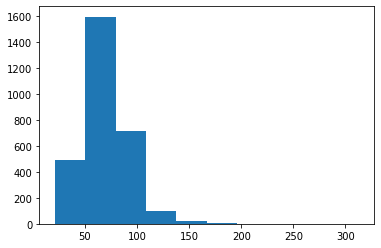

In [34]:
plt.hist(df['Lot.Frontage'])

#### Mas Vnr Type - Masonry veneer type
The different types of categories.  
- BrkcCmn- Brick Common
- BrkFace- Brick Face
- CBlock - Cinder Block
- None- None
- Stone - Stone 
Since there are different types of Mas Vnr Type and there is a category as none we will replace all the None as nomas

In [35]:
df['Mas.Vnr.Type'].value_counts()

None       1752
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas.Vnr.Type, dtype: int64

In [36]:
df['Mas.Vnr.Type'].fillna("NoMas", inplace=True)

#### Mas.Vnr.Area 
Since the same goes with area if there is no types of masonary then there is no masonary veneer area. We will keep the null values because it is already as 0 and the data type is float which means the 0 values can be included.  

In [37]:
df['Mas.Vnr.Area'].isna().sum()

23

In [38]:
df['Mas.Vnr.Area'].value_counts()

0.0       1748
120.0       15
200.0       13
176.0       13
216.0       12
          ... 
1170.0       1
877.0        1
11.0         1
63.0         1
1159.0       1
Name: Mas.Vnr.Area, Length: 445, dtype: int64

In [39]:
df['Mas.Vnr.Area'].fillna(0.0,inplace=True)

### Basements 
Analyzing all the null values in basement
After looking in the variable description when there are null values for Basment it means that the building does not have a basement. 
- For categorical variables the null values will change to a new category of NoB 
- For numerical variables the null values will change to 0.0 like the other values in the set

#### Bsmt.Qual 
shows the value counts and the check of the types of variables it includes. 
Then very last step filling variable.  
This is what was the done for the rest of the basenent variables


In [40]:
df['Bsmt.Qual'].unique()

array(['TA', 'Gd', 'Ex', nan, 'Fa', 'Po'], dtype=object)

In [41]:
df['Bsmt.Qual'].value_counts()

TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt.Qual, dtype: int64

In [42]:
df['Bsmt.Qual'].isna().sum()

80

In [43]:
#will fill nan value with NoB
df['Bsmt.Qual'].fillna("NoB", inplace=True)

####  Bsmt.Cond 
Sincce basement condition follows the same patter as Bsmt.Qual all the nan values will be replaced with a new varriable Nob as well

In [44]:
df['Bsmt.Cond'].fillna("NoB", inplace=True)

In [45]:
df['Bsmt.Exposure'].fillna("NoB", inplace=True)

In [46]:
df['BsmtFin.Type.1'].fillna("NoB",inplace=True)

In [47]:
df['BsmtFin.Type.2'].fillna("NoB", inplace=True)

In [48]:
df['BsmtFin.SF.1'].fillna(0.0,inplace=True)

In [49]:
df['BsmtFin.SF.2'].fillna(0.0,inplace=True)

In [50]:
df['Bsmt.Full.Bath'].isna().sum()

2

In [51]:
df['Bsmt.Full.Bath'].value_counts()

0.0    1707
1.0    1181
2.0      38
3.0       2
Name: Bsmt.Full.Bath, dtype: int64

In [52]:
df['Bsmt.Full.Bath'].fillna(0.0,inplace=True)

In [53]:
df['Bsmt.Half.Bath'].isna().sum()

2

In [54]:
df['Bsmt.Half.Bath'].value_counts()

0.0    2753
1.0     171
2.0       4
Name: Bsmt.Half.Bath, dtype: int64

In [55]:
df['Bsmt.Half.Bath'].fillna(0.0,inplace=True)

In [56]:
df['Bsmt.Unf.SF'].value_counts()

0.0       244
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
1126.0      1
1194.0      1
1212.0      1
1603.0      1
1211.0      1
Name: Bsmt.Unf.SF, Length: 1137, dtype: int64

In [57]:
df['Bsmt.Unf.SF'].fillna(0.0,inplace=True)

In [58]:
df['Total.Bsmt.SF'].value_counts()

0.0       79
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1603.0     1
5095.0     1
839.0      1
2630.0     1
1570.0     1
Name: Total.Bsmt.SF, Length: 1058, dtype: int64

In [59]:
df['Total.Bsmt.SF'].fillna(0.0,inplace=True)

### Fireplaces 
Looking through the variables that have to do with fireplace and adding 0 values or deleting null values

In [61]:
df['Fireplaces'].value_counts()

0    1422
1    1274
2     221
3      12
4       1
Name: Fireplaces, dtype: int64

In [62]:
df['Fireplace.Qu'].value_counts()

Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace.Qu, dtype: int64

In [63]:
df['Fireplace.Qu'].isna().sum()

1422

In [64]:
#since it matches the number of 0 fireplace 
#the null values will be replaced by "NoF" for no fireplace
df['Fireplace.Qu'].fillna("NoF", inplace=True)

### Garages 
wil look through all the garages and fill in missing values

In [66]:
#looking at Garage.Type
df['Garage.Type'].value_counts()

Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage.Type, dtype: int64

In [67]:
df['Garage.Type'].isna().sum()

157

In [68]:
df['Garage.Type'].fillna("NoG",inplace=True)

In [69]:
df['Garage.Yr.Blt'].isna().sum()

159

In [70]:
df['Garage.Finish'].isna().sum()

159

In [71]:
df['Garage.Cars'].value_counts()

2.0    1603
1.0     778
3.0     374
0.0     157
4.0      16
5.0       1
Name: Garage.Cars, dtype: int64

In [72]:
# Since Garage Cars 0.0 matches the number of Garage Type for null values.  
#deleting the one null value is the best choice since it will not change the shape of the data too much 
df.dropna(axis=0,subset =['Garage.Cars'],inplace=True)

In [74]:
df['Garage.Area'].value_counts()

0.0       157
576.0      97
440.0      96
484.0      76
240.0      69
         ... 
208.0       1
815.0       1
1043.0      1
1184.0      1
428.0       1
Name: Garage.Area, Length: 603, dtype: int64

In [75]:
df['Garage.Area'].isna().sum()

0

In [76]:
df['Garage.Finish'].isna().sum()

158

In [77]:
df['Garage.Finish'].fillna("NoG",inplace=True)

In [78]:
df['Garage.Cond'].isna().sum()

158

In [79]:
df['Garage.Cond'].fillna("NoG",inplace=True)

In [80]:
df['Garage.Yr.Blt'].isna().sum()

158

In [81]:
df['Garage.Yr.Blt'].unique()

array([1960., 1961., 1958., 1968., 1997., 1998., 2001., 1992., 1995.,
       1999., 1993., 1990., 1985., 2003., 1988., 2010., 1951., 1978.,
       1977., 1974., 2000., 1970., 1971.,   nan, 1975., 2009., 2008.,
       2005., 2004., 2002., 2006., 1996., 1994., 1980., 1979., 1984.,
       1986., 1920., 1987., 1973., 1963., 1962., 1976., 1967., 1972.,
       1966., 1964., 1950., 1949., 1954., 1955., 1959., 1957., 1956.,
       1952., 1953., 1989., 1948., 1900., 1927., 1915., 1945., 1940.,
       1938., 1928., 1930., 1926., 1939., 1942., 1923., 1917., 1910.,
       1965., 1969., 1947., 1946., 1941., 1924., 1922., 1896., 2007.,
       1983., 1981., 1991., 1982., 1916., 1925., 1936., 1935., 1931.,
       1934., 1929., 1918., 1921., 1937., 1932., 1906., 1908., 1895.,
       1933., 2207., 1914., 1943., 1919.])

In [82]:
"""# since there are none that say 0. 
Replace all null with 0 meaning that there is not garage"""
df['Garage.Yr.Blt'].fillna(0.0, inplace=True)

In [83]:
df['Garage.Qual'].value_counts()

TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage.Qual, dtype: int64

In [84]:
df['Garage.Qual'].isna().sum()

158

In [103]:
#filling null values with NoG for no garage 
df['Garage.Qual'].fillna("NoG", inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 1 to 2930
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2929 non-null   int64  
 1   MS.Zoning        2929 non-null   object 
 2   Lot.Frontage     2929 non-null   float64
 3   Lot.Area         2929 non-null   int64  
 4   Street           2929 non-null   object 
 5   Alley            2929 non-null   object 
 6   Lot.Shape        2929 non-null   object 
 7   Land.Contour     2929 non-null   object 
 8   Utilities        2929 non-null   object 
 9   Lot.Config       2929 non-null   object 
 10  Land.Slope       2929 non-null   object 
 11  Neighborhood     2929 non-null   object 
 12  Condition.1      2929 non-null   object 
 13  Condition.2      2929 non-null   object 
 14  Bldg.Type        2929 non-null   object 
 15  House.Style      2929 non-null   object 
 16  Overall.Qual     2929 non-null   int64  
 17  Overall.Cond  

## Visually Exploring the data 
Creating plots to look at features that are similar as well as looking at the shape of the data after deleting variables.

#### Create a Pearson Correlation heatmap

In [106]:
corr=df.corr()
corr.round(2).style.background_gradient(cmap='cool')



#### Looking at boxpllot for every column 

In [107]:
dfs=df.drop('SalePrice',axis=1, inplace=False)

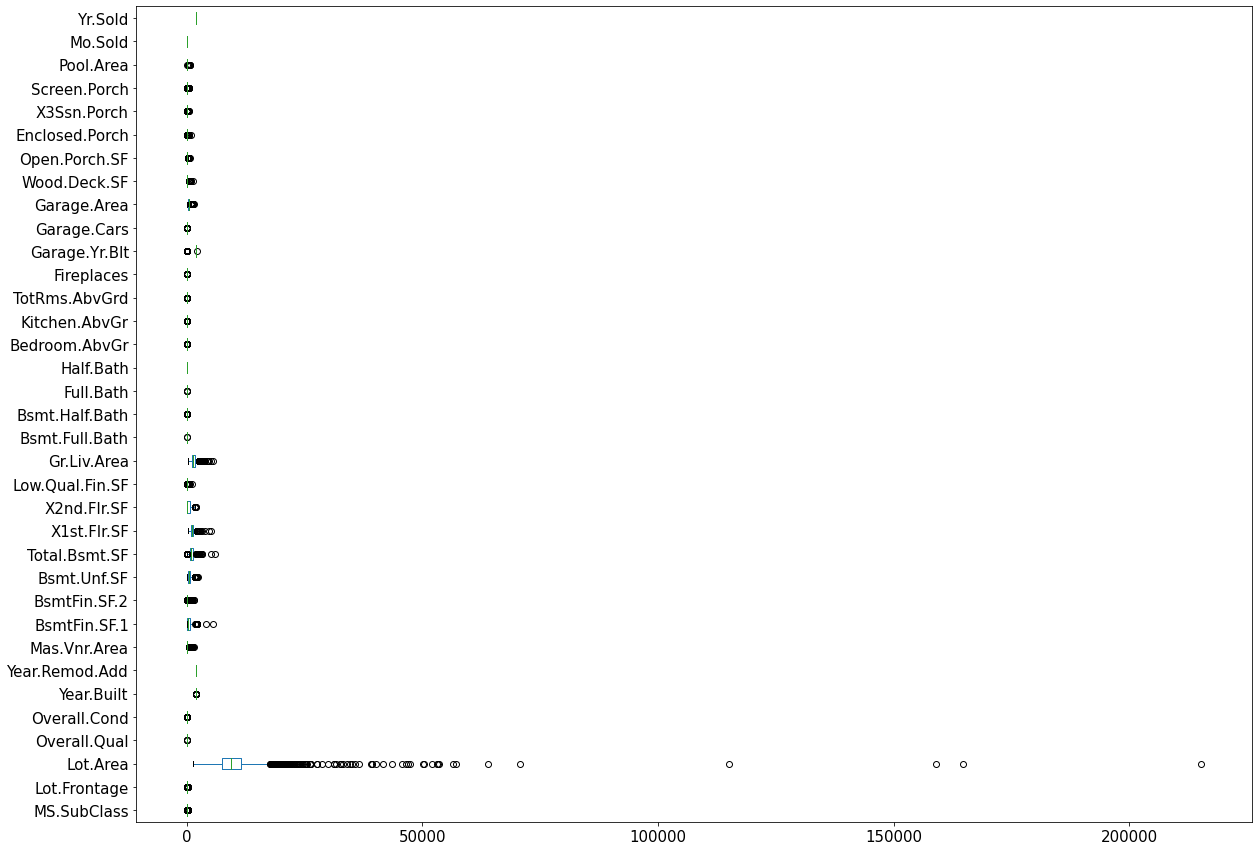

In [108]:
boxplot=dfs.boxplot(grid=False, vert=False, fontsize=15, figsize=(20,15))

#### Looking at SalePrice dsitribution 

<AxesSubplot:>

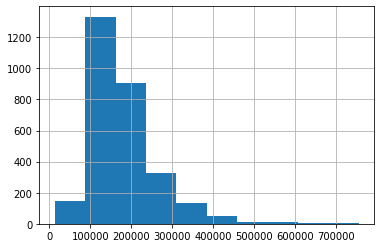

In [109]:
df.SalePrice.hist()

#### Looking at the variable corelation matrix 

In [110]:
#take out the response variable (the variable we want to predict)
corr_matrix=df.drop(['SalePrice'], axis=1).corr().abs()

#get the upp triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#drop values
to_drop=[column for column in upper.columns if any (upper[column]>0.95)]

<ipython-input-110-9318291941b3>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [111]:
corr_matrix

MS.SubClass  Lot.Frontage  Lot.Area  Overall.Qual  \
MS.SubClass         1.000000      0.392960  0.204603      0.039502   
Lot.Frontage        0.392960      1.000000  0.381604      0.185897   
Lot.Area            0.204603      0.381604  1.000000      0.097162   
Overall.Qual        0.039502      0.185897  0.097162      1.000000   
Overall.Cond        0.067392      0.051594  0.034741      0.094720   
Year.Built          0.036757      0.096797  0.023193      0.596925   
Year.Remod.Add      0.043329      0.068470  0.021717      0.569903   
Mas.Vnr.Area        0.003691      0.201474  0.125931      0.423005   
BsmtFin.SF.1        0.059792      0.190927  0.191706      0.284551   
BsmtFin.SF.2        0.070820      0.048083  0.083185      0.041205   
Bsmt.Unf.SF         0.129939      0.099488  0.023858      0.270420   
Total.Bsmt.SF       0.218456      0.314869  0.253753      0.547724   
X1st.Flr.SF         0.247789      0.411179  0.332227      0.477764   
X2nd.Flr.SF         0.304197      0.038011  0.033066      0.241835   
Low.Qual.Fin.SF     0.025776      0.004284  0.000807      0.048712   
Gr.Liv.Area         0.068001      0.351367  0.285651      0.570828   
Bsmt.Full.Bath      0.014272      0.089796  0.124184      0.168192   
Bsmt.Half.Bath      0.003154      0.002390  0.026436      0.041504   
Full.Bath           0.134568      0.152502  0.127484      0.522579   
Half.Bath           0.175975      0.043624  0.035465      0.268707   
Bedroom.AbvGr       0.019226      0.232973  0.136578      0.063345   
Kitchen.AbvGr       0.257725      0.006386  0.020310      0.159817   
TotRms.AbvGrd       0.031928      0.330076  0.216587      0.380662   
Fireplaces          0.049870      0.229642  0.256984      0.392860   
Garage.Yr.Blt       0.103071      0.095511  0.073070      0.278312   
Garage.Cars         0.045883      0.277740  0.179512      0.599545   
Garage.Area         0.103239      0.329264  0.212822      0.563503   
Wood.Deck.SF        0.017375      0.105236  0.157254      0.255875   
Open.Porch.SF       0.014753      0.152769  0.103736      0.298281   
Enclosed.Porch      0.023198      0.009489  0.022040      0.139773   
X3Ssn.Porch         0.037946      0.014286  0.016238      0.018215   
Screen.Porch        0.050587      0.079161  0.055032      0.041544   
Pool.Area           0.003428      0.157443  0.093773      0.030386   
Mo.Sold             0.000470      0.015816  0.003804      0.030800   
Yr.Sold             0.017846      0.008670  0.023115      0.020882   

                 Overall.Cond  Year.Built  Year.Remod.Add  Mas.Vnr.Area  \
MS.SubClass          0.067392    0.036757        0.043329      0.003691   
Lot.Frontage         0.051594    0.096797        0.068470      0.201474   
Lot.Area             0.034741    0.023193        0.021717      0.125931   
Overall.Qual         0.094720    0.596925        0.569903      0.423005   
Overall.Cond         1.000000    0.368729        0.047591      0.132407   
Year.Built           0.368729    1.000000        0.612801      0.306639   
Year.Remod.Add       0.047591    0.612801        1.000000      0.191904   
Mas.Vnr.Area         0.132407    0.306639        0.191904      1.000000   
BsmtFin.SF.1         0.051374    0.280321        0.152199      0.300015   
BsmtFin.SF.2         0.041033    0.027500        0.061870      0.015013   
Bsmt.Unf.SF          0.137239    0.129066        0.165556      0.089562   
Total.Bsmt.SF        0.174131    0.407717        0.298533      0.393480   
X1st.Flr.SF          0.156989    0.310311        0.242275      0.392214   
X2nd.Flr.SF          0.006048    0.017542        0.158687      0.120448   
Low.Qual.Fin.SF      0.009189    0.144401        0.060346      0.057196   
Gr.Liv.Area          0.115741    0.242204        0.316748      0.400879   
Bsmt.Full.Bath       0.043354    0.211787        0.134815      0.139549   
Bsmt.Half.Bath       0.084222    0.030665        0.046120      0.016562   
Full.Bath            0.214449    0.470089        0.457164      0.254664

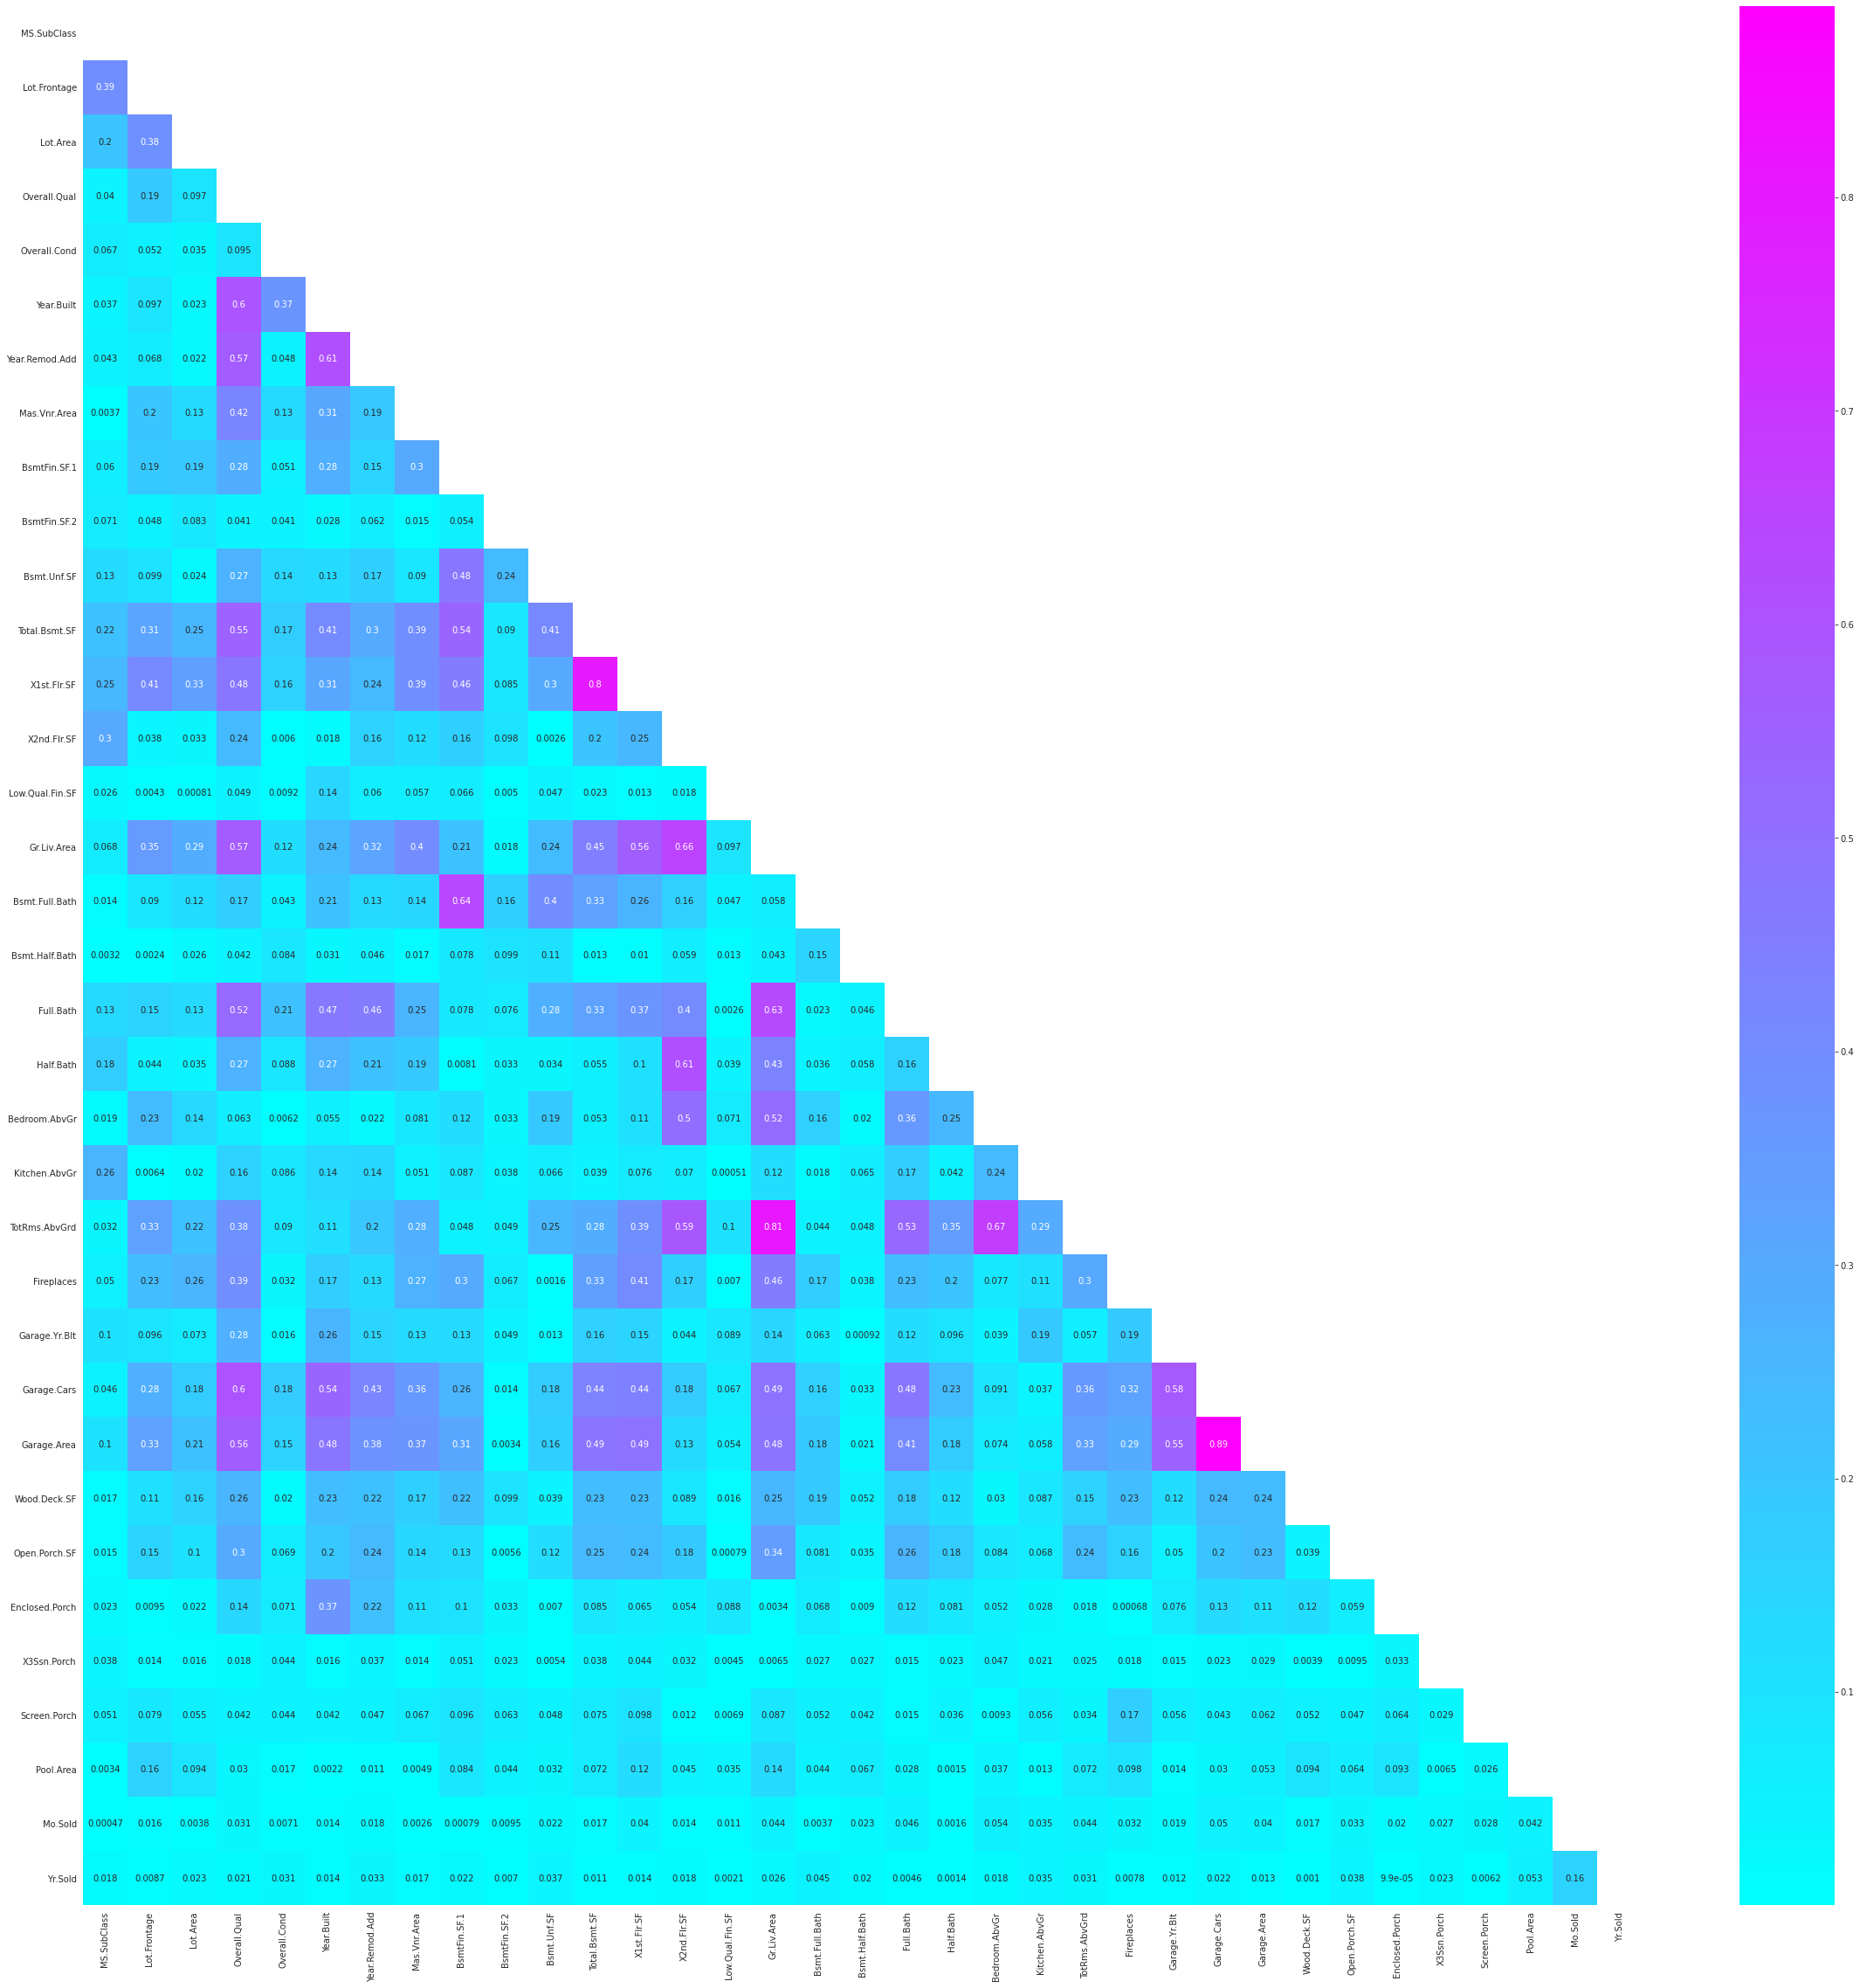

In [112]:
mask=np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(40,40))
    ax=sns.heatmap(corr_matrix, mask=mask,annot=True, cmap="cool")#YlGnBu (other color combination)
plt.savefig('figures/correlations.png',bbox_inches='tight')

In [113]:
upper

MS.SubClass  Lot.Frontage  Lot.Area  Overall.Qual  \
MS.SubClass              NaN       0.39296  0.204603      0.039502   
Lot.Frontage             NaN           NaN  0.381604      0.185897   
Lot.Area                 NaN           NaN       NaN      0.097162   
Overall.Qual             NaN           NaN       NaN           NaN   
Overall.Cond             NaN           NaN       NaN           NaN   
Year.Built               NaN           NaN       NaN           NaN   
Year.Remod.Add           NaN           NaN       NaN           NaN   
Mas.Vnr.Area             NaN           NaN       NaN           NaN   
BsmtFin.SF.1             NaN           NaN       NaN           NaN   
BsmtFin.SF.2             NaN           NaN       NaN           NaN   
Bsmt.Unf.SF              NaN           NaN       NaN           NaN   
Total.Bsmt.SF            NaN           NaN       NaN           NaN   
X1st.Flr.SF              NaN           NaN       NaN           NaN   
X2nd.Flr.SF              NaN           NaN       NaN           NaN   
Low.Qual.Fin.SF          NaN           NaN       NaN           NaN   
Gr.Liv.Area              NaN           NaN       NaN           NaN   
Bsmt.Full.Bath           NaN           NaN       NaN           NaN   
Bsmt.Half.Bath           NaN           NaN       NaN           NaN   
Full.Bath                NaN           NaN       NaN           NaN   
Half.Bath                NaN           NaN       NaN           NaN   
Bedroom.AbvGr            NaN           NaN       NaN           NaN   
Kitchen.AbvGr            NaN           NaN       NaN           NaN   
TotRms.AbvGrd            NaN           NaN       NaN           NaN   
Fireplaces               NaN           NaN       NaN           NaN   
Garage.Yr.Blt            NaN           NaN       NaN           NaN   
Garage.Cars              NaN           NaN       NaN           NaN   
Garage.Area              NaN           NaN       NaN           NaN   
Wood.Deck.SF             NaN           NaN       NaN           NaN   
Open.Porch.SF            NaN           NaN       NaN           NaN   
Enclosed.Porch           NaN           NaN       NaN           NaN   
X3Ssn.Porch              NaN           NaN       NaN           NaN   
Screen.Porch             NaN           NaN       NaN           NaN   
Pool.Area                NaN           NaN       NaN           NaN   
Mo.Sold                  NaN           NaN       NaN           NaN   
Yr.Sold                  NaN           NaN       NaN           NaN   

                 Overall.Cond  Year.Built  Year.Remod.Add  Mas.Vnr.Area  \
MS.SubClass          0.067392    0.036757        0.043329      0.003691   
Lot.Frontage         0.051594    0.096797        0.068470      0.201474   
Lot.Area             0.034741    0.023193        0.021717      0.125931   
Overall.Qual         0.094720    0.596925        0.569903      0.423005   
Overall.Cond              NaN    0.368729        0.047591      0.132407   
Year.Built                NaN         NaN        0.612801      0.306639   
Year.Remod.Add            NaN         NaN             NaN      0.191904   
Mas.Vnr.Area              NaN         NaN             NaN           NaN   
BsmtFin.SF.1              NaN         NaN             NaN           NaN   
BsmtFin.SF.2              NaN         NaN             NaN           NaN   
Bsmt.Unf.SF               NaN         NaN             NaN           NaN   
Total.Bsmt.SF             NaN         NaN             NaN           NaN   
X1st.Flr.SF               NaN         NaN             NaN           NaN   
X2nd.Flr.SF               NaN         NaN             NaN           NaN   
Low.Qual.Fin.SF           NaN         NaN             NaN           NaN   
Gr.Liv.Area               NaN         NaN             NaN           NaN   
Bsmt.Full.Bath            NaN         NaN             NaN           NaN   
Bsmt.Half.Bath            NaN         NaN             NaN           NaN   
Full.Bath                 NaN         NaN             NaN           NaN

##### To view variables that are highly correlated and also variables that are extremely not correlated.  Will delete the ones that are highly correlated (over 95) and the ones that are less than 20% correlated.  

In [114]:
corrd=df.corr()
cordv=abs(corrd.corr()['SalePrice']).sort_values(ascending=False)
cordv

SalePrice          1.000000
Overall.Qual       0.960649
Garage.Area        0.884506
Garage.Cars        0.883819
Year.Built         0.828952
Total.Bsmt.SF      0.826157
Mas.Vnr.Area       0.817193
X1st.Flr.SF        0.806982
Gr.Liv.Area        0.800616
Year.Remod.Add     0.788279
Full.Bath          0.774314
Fireplaces         0.740709
Open.Porch.SF      0.589741
TotRms.AbvGrd      0.580297
BsmtFin.SF.1       0.578623
Wood.Deck.SF       0.562956
Lot.Frontage       0.545487
Garage.Yr.Blt      0.526774
Enclosed.Porch     0.490942
Overall.Cond       0.485586
Lot.Area           0.415638
Half.Bath          0.383410
Bsmt.Full.Bath     0.373928
Bsmt.Unf.SF        0.359620
Kitchen.AbvGr      0.314591
Low.Qual.Fin.SF    0.291087
MS.SubClass        0.266012
Bsmt.Half.Bath     0.261632
X2nd.Flr.SF        0.204741
Yr.Sold            0.203588
BsmtFin.SF.2       0.171708
Bedroom.AbvGr      0.133758
X3Ssn.Porch        0.086932
Mo.Sold            0.060711
Screen.Porch       0.046031
Pool.Area          0

#### Deleting Highly Correlated Variables & variables that are extremely not correlated.  

In [115]:
dff= df.drop(['Overall.Qual','Pool.Area'], axis=1)

In [116]:
dff.info()
dff.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 1 to 2930
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2929 non-null   int64  
 1   MS.Zoning        2929 non-null   object 
 2   Lot.Frontage     2929 non-null   float64
 3   Lot.Area         2929 non-null   int64  
 4   Street           2929 non-null   object 
 5   Alley            2929 non-null   object 
 6   Lot.Shape        2929 non-null   object 
 7   Land.Contour     2929 non-null   object 
 8   Utilities        2929 non-null   object 
 9   Lot.Config       2929 non-null   object 
 10  Land.Slope       2929 non-null   object 
 11  Neighborhood     2929 non-null   object 
 12  Condition.1      2929 non-null   object 
 13  Condition.2      2929 non-null   object 
 14  Bldg.Type        2929 non-null   object 
 15  House.Style      2929 non-null   object 
 16  Overall.Cond     2929 non-null   int64  
 17  Year.Built    

(2929, 74)

In [117]:
dff.to_csv("datafile_final.csv")